<center><font size="+4">Programming and Data Analytics 2021/2022</font></center>
<center><font size="+2">Module 2</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/StatsAndComputing20202021/raw/main/IPDP/jupyter/jupyterNotebooks/images/SSSA.png" width="700" alt="Sant'Anna School for Advanced Studies Pisa, Italy"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

<center><font size="+2">Co-lecturer </font></center>
<center><font size="+2">Daniele Licari d.licari@santannapisa.it</font></center>

---

<center><font size="+2">Part 3</font></center>
<center><font size="+1">Research-driven topics</font></center>
<center><font size="+1">Process-oriented Data Science: Process mining</font></center>

---
---

# Download files

In [26]:
url = 'https://raw.githubusercontent.com/EMbeDS-education/StatsAndComputing20212022/main/PDA/jupyter/jupyterNotebooks/PurchasingExample.csv'
url2 = 'https://raw.githubusercontent.com/EMbeDS-education/StatsAndComputing20212022/main/PDA/jupyter/jupyterNotebooks/burgers.csv'

import urllib.request
from pathlib import Path

urllib.request.urlretrieve(url,Path(url).name)
urllib.request.urlretrieve(url2,Path(url2).name)

('burgers.csv', <http.client.HTTPMessage at 0x7f791215cf70>)

# Understanding processes and process mining

## Further material

Part of the material for this section is from [here](https://pm4py.fit.fraunhofer.de/getting-started-page#understanding)

Further material can be found here
- [Disco Tour](https://fluxicon.com/disco/files/Disco-Tour.pdf)
- [Coursera MOOC on Process Mining](https://www.coursera.org/learn/process-mining) (it should be for free)

## Processes

Most companies execute several _processes_
- A process represents a _structured collection of __activities__, resources and personnel_ necessary to reach a __goal__
- Examples
  - The process to manufacture a car
  - The process to cook a pizza
  - The process to provide a service
  - __The process to deliver burgers operated by a burger restaurant__
  - ....
  

## Burger delivery process

Let us consider the burger example.

### Two process instances

Andrea calls the restaurant McPython's
- From the __CaPythonE__ chain ;)

__Lucy__ handles the order by performing the following __activities__, in this order, involving also the chef __Luigi__, and the delivery boy __Mike__:
<ol>
<li><i><b>Lucy</b> takes your order</i></li>
<li><i><b>Lucy</b> notes down your address</i></li>
<li><i><b>Lucy</b> notes down your preferred payment method</i></li>
<li><i><b>Luigi</b> prepares your burger</i></li>
<li><i><b>Lucy</b> grabs your can of soda</i></li>
<li><i><b>Luigi</b> puts your burger in a box</i></li>
<li><i><b>Lucy</b> wraps your order</i></li>
<li><i><b>Mike</b> delivers your order</i></li>
</ol>

This is an __instance__ of the process, or a __trace__

A few days afterwards, Daniele calls as well the restaurant.

This time, __Randy__ handles the order with the help of the chef __Luigi__ and of the delivery boy __John__:
<ol>
                                    <li><i><b>Randy</b> takes your order</i></li>
                                    <li><i><b>Randy</b> notes down your preferred payment method</i></li>
                                    <li><i><b>Randy</b> notes down your address</i></li>
                                    <li><i><b>Luigi</b> prepares your burger</i></li>
                                    <li><i><b>Luigi</b> puts your burger in a box</i></li>
                                    <li><i><b>Randy</b> wraps your order</i></li>
                                    <li><i><b>John</b> delivers your order</i></li>
                                </ol>
                                
This is another instance of the process, a trace, where
- Daniele did not ask for drinks
- Randy performed certain activities in a different order
  - He first noted down the payment method, and then the address

### Event logs

Several of such process instances are typically collected in __event logs__
- One row per 'event' (per point 1-8, 1-7 above)
  - An event corresponds to the execution of an activity
- More events per case/instance

This is a very simple event log of the burger restaurant for Andrea's and Daniele's order

In [27]:
import pandas as pd
burgers_log=pd.read_csv("burgers.csv")
burgers_log

,case_id,activity,resource,timestamp
0,1337,Take Order,Lucy,01/04/2020 13:37
1,1337,Note Address of Customer,Lucy,01/04/2020 13:39
2,1337,Register Payment Method,Lucy,01/04/2020 13:40
3,1337,Prepare Burger,Luigi,01/04/2020 13:41
4,1337,Grab Soda,Lucy,01/04/2020 13:42
5,1337,Put Burger in Box,Luigi,01/04/2020 13:52
6,1337,Wrap Order,Lucy,01/04/2020 13:53
7,1337,Deliver Order,Mike,01/04/2020 13:55
8,1538,Take Order,Randy,08/04/2020 12:37
9,1538,Register Payment Method,Randy,08/04/2020 12:39


Andrea's order

In [28]:
burgers_log[burgers_log.case_id==1337]

,case_id,activity,resource,timestamp
0,1337,Take Order,Lucy,01/04/2020 13:37
1,1337,Note Address of Customer,Lucy,01/04/2020 13:39
2,1337,Register Payment Method,Lucy,01/04/2020 13:40
3,1337,Prepare Burger,Luigi,01/04/2020 13:41
4,1337,Grab Soda,Lucy,01/04/2020 13:42
5,1337,Put Burger in Box,Luigi,01/04/2020 13:52
6,1337,Wrap Order,Lucy,01/04/2020 13:53
7,1337,Deliver Order,Mike,01/04/2020 13:55


### Process discovery

Starting from an event log, we can run __discovery algorithms__ from process mining to 
- synthetize a system description (a process) that matches the observed logs

For the event log above we obtain:

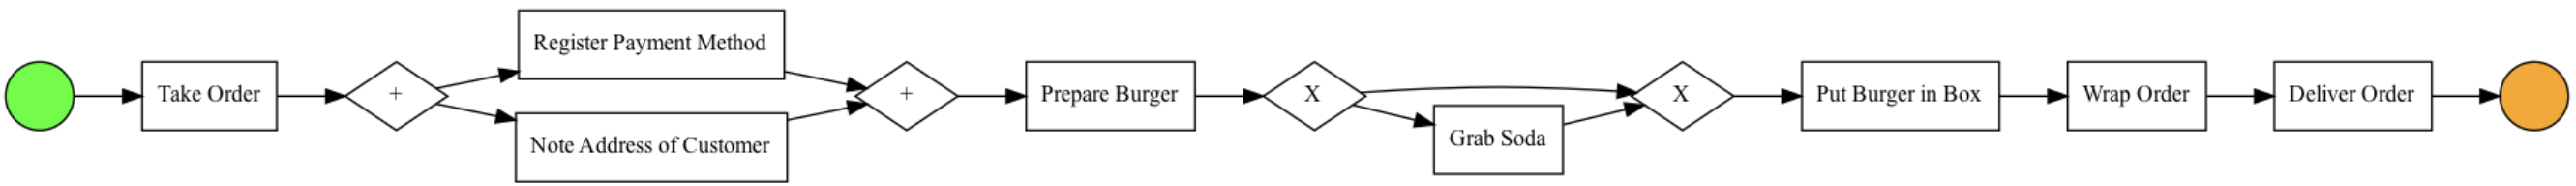

In [29]:
from IPython.display import Image, display
#img=Image(filename='images/tentativeLecturePlan.png',width=700)
url_github_repo="https://github.com/EMbeDS-education/StatsAndComputing20212022/raw/main/PDA/"
img=Image(url_github_repo+'slides/processMining/actual_simple_sample_model.png',width=1300)
display(img)

We can see that 
- 2 of events can be executed in parallel
  - Note address and Register Payment Method
- Grab soda is optional

The above process can be generated using a Python library for Process mining
- [PM4PY](https://pm4py.fit.fraunhofer.de/getting-started-page#understanding)
- However, it is a bit too 'technical' for today's class. 

Tiday we will focus on a graphical easy-to-use industrial tool
- [Disco](https://fluxicon.com/disco/)
- It focuses on providing more intuitive process descriptions easily understandable by domain experts

Disco's output for the simple event-log is:

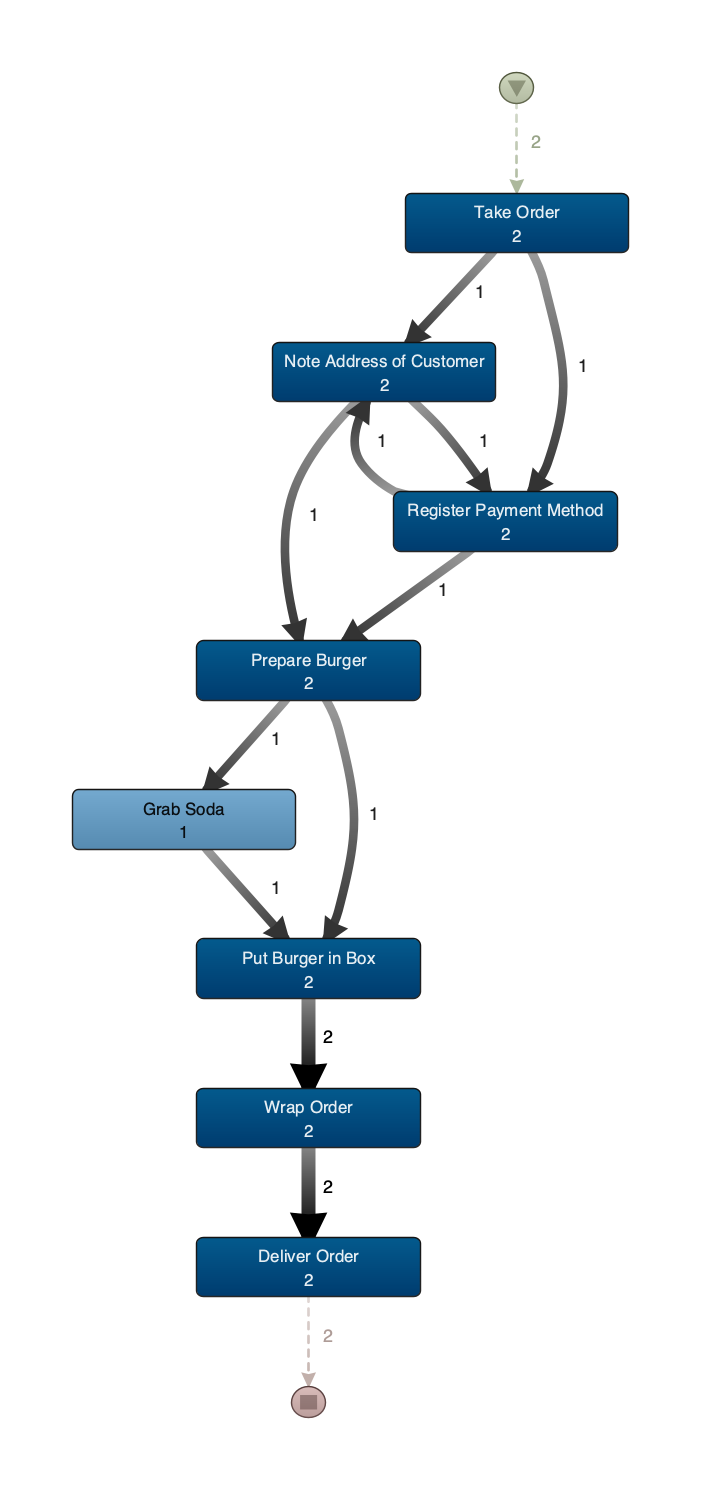

In [30]:
from IPython.display import Image, display
#img=Image(filename='images/tentativeLecturePlan.png',width=700)
url_github_repo="https://github.com/EMbeDS-education/StatsAndComputing20212022/raw/main/PDA/"
img=Image(url_github_repo+'slides/processMining/burgers.png',width=500)
display(img)

# Process discovery with pm4py

> __This examples requires you to have [graphviz](https://graphviz.org/download/) installed__

It works on colab

## Install/load libraries

In [31]:
#The first time you need to install pm4py
%pip install pm4py

Note: you may need to restart the kernel to use updated packages.


In [32]:
#Now you import pandas and pm4py
import pandas as pd
import pm4py

## Load and inspect data

In [33]:
file_path="burgers.csv"
event_log = pd.read_csv(file_path, sep=',')
#file_path="running-example.csv"
#event_log = pd.read_csv(file_path, sep=';')

num_events = event_log.shape[0]
num_cases = len(event_log.case_id.unique())
num_activities = len(event_log.activity.unique())
print("Number of events:    {}\nNumber of cases:      {}\nNumber of activities: {}".format(num_events, num_cases,num_activities))
event_log

Number of events:    15
Number of cases:      2
Number of activities: 8


,case_id,activity,resource,timestamp
0,1337,Take Order,Lucy,01/04/2020 13:37
1,1337,Note Address of Customer,Lucy,01/04/2020 13:39
2,1337,Register Payment Method,Lucy,01/04/2020 13:40
3,1337,Prepare Burger,Luigi,01/04/2020 13:41
4,1337,Grab Soda,Lucy,01/04/2020 13:42
5,1337,Put Burger in Box,Luigi,01/04/2020 13:52
6,1337,Wrap Order,Lucy,01/04/2020 13:53
7,1337,Deliver Order,Mike,01/04/2020 13:55
8,1538,Take Order,Randy,08/04/2020 12:37
9,1538,Register Payment Method,Randy,08/04/2020 12:39


In [34]:
event_log = pm4py.format_dataframe(event_log, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
start_activities = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'Take Order': 2}
End activities: {'Deliver Order': 2}


## Generate and view BPMN

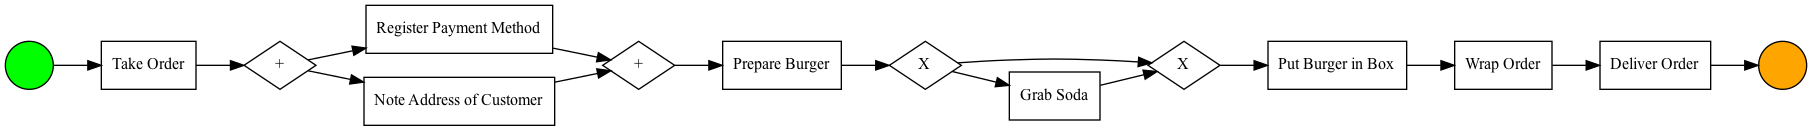

In [35]:
process_tree = pm4py.discover_process_tree_inductive(event_log)
#print(process_tree)

#from pm4py.visualization.process_tree import visualizer as pt_visualizer
#gviz = pt_visualizer.apply(process_tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
#pt_visualizer.view(gviz)

bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

## Generate and view Process map (Disco-style)

/Users/andrea/Documents/python_envs/env_pda_2022/lib/python3.9/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]


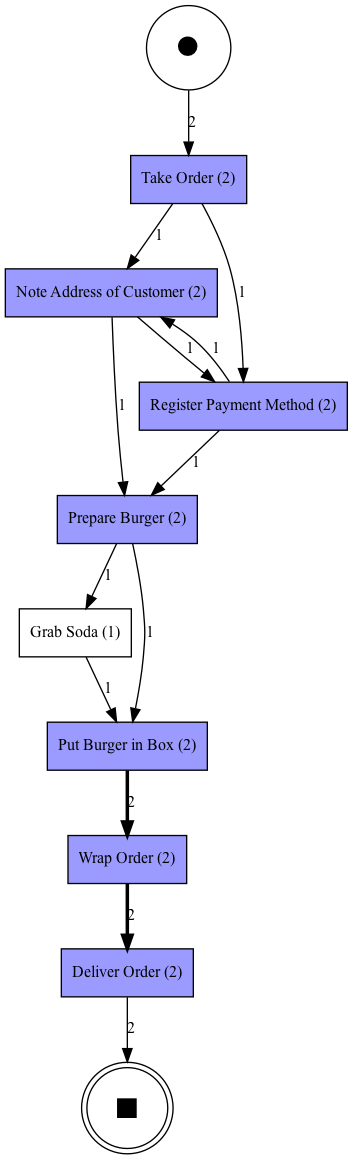

In [36]:
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

## Further material

An application of pn4py to the healthcae domain
- [Part 1](https://medium.com/@c3_62722/process-mining-with-python-tutorial-a-healthcare-application-part-1-ae02027a050)
- [Part 2](https://medium.com/@c3_62722/process-mining-with-python-tutorial-a-healthcare-application-part-2-4cf57053421f)

# Material for tutorial on Fluxicon Disco

## Load data

In [37]:
import pandas as pd

In [38]:
logs = pd.read_csv("PurchasingExample.csv")
logs["Start Timestamp"]=pd.to_datetime(logs["Start Timestamp"])
logs["Complete Timestamp"]=pd.to_datetime(logs["Complete Timestamp"])
logs.sort_values(by="Start Timestamp",inplace=True)

logs

,Case ID,Start Timestamp,Complete Timestamp,Activity,Resource,Role
0,1,2011-01-01 00:00:00,2011-01-01 00:37:00,Create Purchase Requisition,Kim Passa,Requester
1,2,2011-01-01 00:16:00,2011-01-01 00:29:00,Create Purchase Requisition,Immanuel Karagianni,Requester
2,3,2011-01-01 02:23:00,2011-01-01 03:03:00,Create Purchase Requisition,Kim Passa,Requester
3,1,2011-01-01 05:37:00,2011-01-01 05:45:00,Create Request for Quotation,Kim Passa,Requester
4,1,2011-01-01 06:41:00,2011-01-01 06:55:00,Analyze Request for Quotation,Karel de Groot,Purchasing Agent
...,...,...,...,...,...,...
9114,1284,2011-10-14 13:53:00,2011-10-14 14:07:00,Pay Invoice,Pedro Alvares,Financial Manager
9115,1448,2011-10-14 13:56:00,2011-10-14 14:24:00,Settle Dispute With Supplier,Karalda Nimwada,Financial Manager
9116,1941,2011-10-14 14:05:00,2011-10-14 14:18:00,Analyze Request for Quotation,Karel de Groot,Purchasing Agent
9117,1448,2011-10-14 14:24:00,2011-10-14 14:24:00,Authorize Supplier's Invoice payment,Karalda Nimwada,Financial Manager


In [39]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9119 entries, 0 to 9118
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Case ID             9119 non-null   int64         
 1   Start Timestamp     9119 non-null   datetime64[ns]
 2   Complete Timestamp  9119 non-null   datetime64[ns]
 3   Activity            9119 non-null   object        
 4   Resource            9119 non-null   object        
 5   Role                9119 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 498.7+ KB


## Extract the case with ID 1

In [40]:
logs[logs["Case ID"]==1]

,Case ID,Start Timestamp,Complete Timestamp,Activity,Resource,Role
0,1,2011-01-01 00:00:00,2011-01-01 00:37:00,Create Purchase Requisition,Kim Passa,Requester
3,1,2011-01-01 05:37:00,2011-01-01 05:45:00,Create Request for Quotation,Kim Passa,Requester
4,1,2011-01-01 06:41:00,2011-01-01 06:55:00,Analyze Request for Quotation,Karel de Groot,Purchasing Agent
12,1,2011-01-01 11:43:00,2011-01-01 12:09:00,Send Request for Quotation to Supplier,Karel de Groot,Purchasing Agent
13,1,2011-01-01 12:32:00,2011-01-01 16:03:00,Create Quotation comparison Map,Magdalena Predutta,Purchasing Agent
36,1,2011-01-01 22:44:00,2011-01-01 23:13:00,Analyze Quotation Comparison Map,Immanuel Karagianni,Requester
37,1,2011-01-01 23:13:00,2011-01-01 23:13:00,Choose best option,Tesca Lobes,Requester
42,1,2011-01-02 01:22:00,2011-01-02 09:20:00,Settle Conditions With Supplier,Francois de Perrier,Purchasing Agent
60,1,2011-01-02 09:58:00,2011-01-02 10:10:00,Create Purchase Order,Karel de Groot,Purchasing Agent
68,1,2011-01-02 14:09:00,2011-01-02 14:43:00,Confirm Purchase Order,Sean Manney,Supplier


## Extract the case with ID 2

In [41]:
logs[logs["Case ID"]==2]

,Case ID,Start Timestamp,Complete Timestamp,Activity,Resource,Role
1,2,2011-01-01 00:16:00,2011-01-01 00:29:00,Create Purchase Requisition,Immanuel Karagianni,Requester
5,2,2011-01-01 08:16:00,2011-01-01 08:26:00,Create Request for Quotation,Alberto Duport,Requester
7,2,2011-01-01 09:34:00,2011-01-01 09:38:00,Analyze Request for Quotation,Karel de Groot,Purchasing Agent
9,2,2011-01-01 10:16:00,2011-01-01 10:21:00,Amend Request for Quotation,Christian Francois,Requester
10,2,2011-01-01 11:15:00,2011-01-01 11:48:00,Analyze Request for Quotation,Magdalena Predutta,Purchasing Agent
14,2,2011-01-01 12:33:00,2011-01-01 12:39:00,Amend Request for Quotation,Esmana Liubiata,Requester
15,2,2011-01-01 13:28:00,2011-01-01 13:38:00,Analyze Request for Quotation,Karel de Groot,Purchasing Agent
18,2,2011-01-01 15:18:00,2011-01-01 15:40:00,Send Request for Quotation to Supplier,Francois de Perrier,Purchasing Agent
19,2,2011-01-01 15:55:00,2011-01-01 16:43:00,Create Quotation comparison Map,Karel de Groot,Purchasing Agent
39,2,2011-01-01 23:33:00,2011-01-01 23:44:00,Analyze Quotation Comparison Map,Esmana Liubiata,Requester
